# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: |Kwaku | Owusu | ko | 15 Hours | 33% |
| Member 2: | Tunde | Bademosi | tb | 15 Hours | 33% |
| Member 3: | Bukola | Sikiru | bs | 15 Hours | 33% |
| Member 4: |  |  |  |  |  |


## Part 1: Printing to the Console
### (6 Marks)

In [1]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print ("Hello, World! Welcome to Student Gradebook Management System")

Hello, World! Welcome to Student Gradebook Management System


In [2]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number = 40
intake_year = 2024
intake_semester = "Fall" #"Fall" or "Winter"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
implemented = f"This is implemented by Group {lab_group_number}, for ENGG680 {intake_semester} of {intake_year}"
print (implemented)

This is implemented by Group 40, for ENGG680 Fall of 2024


In [3]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")
print(f"The subjects involved in this grading system is {subjects[0]} and {subjects[1]}")

The subjects involved in this grading system is English and Math


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [4]:
# In the space below, please import the Pandas library
# (1 mark)
import pandas as pd

In [10]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)
df_english = pd.read_csv('studentGrades_English.csv')
df_math = pd.read_csv('studentGrades_Math.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls

histogram_english_math_grades.png  studentGrades_English.csv  studentHomerooms.csv
README.md			   studentGrades_Math.csv     StudentManagementSystem.ipynb


In [6]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
%cd engg680_2024_fall

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall


In [8]:
%cd Lab_Assignment1/

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment1


In [11]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [12]:
print(df_studentGrades.head())

  firstName_English lastName_English  studentID  grade_English firstName_Math  \
0              Emma            Smith      10959             95           Emma   
1            Sophia         Robinson      75175             88         Sophia   
2              Emma           Taylor      42257             87           Emma   
3             David         Robinson      55148             86          David   
4           Stephen            Curry      30303             90        Stephen   

  lastName_Math  grade_Math  
0         Smith          90  
1      Robinson          95  
2        Taylor          85  
3      Robinson          87  
4         Curry          88  


In [13]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
student_key = "The Student ID is a unique identifier to merge a student grade in both math and english"
print(student_key)

The Student ID is a unique identifier to merge a student grade in both math and english


In [14]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
print(df_studentGrades.head())

  firstName_English lastName_English  studentID  grade_English firstName_Math  \
0              Emma            Smith      10959             95           Emma   
1            Sophia         Robinson      75175             88         Sophia   
2              Emma           Taylor      42257             87           Emma   
3             David         Robinson      55148             86          David   
4           Stephen            Curry      30303             90        Stephen   

  lastName_Math  grade_Math   GPA  
0         Smith          90  92.5  
1      Robinson          95  91.5  
2        Taylor          85  86.0  
3      Robinson          87  86.5  
4         Curry          88  89.0  


In [15]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
df_studentGrades = df_studentGrades.drop(columns=['firstName_English', 'lastName_English'])


In [16]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
print(df_studentGrades.head())

   studentID  grade_English firstName_Math lastName_Math  grade_Math   GPA
0      10959             95           Emma         Smith          90  92.5
1      75175             88         Sophia      Robinson          95  91.5
2      42257             87           Emma        Taylor          85  86.0
3      55148             86          David      Robinson          87  86.5
4      30303             90        Stephen         Curry          88  89.0


In [17]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_Math': 'firstName',
    'lastName_Math': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })

In [18]:
print(df_studentGrades.head())

   studentID  englishGrade firstName  lastName  mathGrade   GPA
0      10959            95      Emma     Smith         90  92.5
1      75175            88    Sophia  Robinson         95  91.5
2      42257            87      Emma    Taylor         85  86.0
3      55148            86     David  Robinson         87  86.5
4      30303            90   Stephen     Curry         88  89.0


In [19]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
print(df_studentGrades.describe())


          studentID  englishGrade  mathGrade       GPA
count     14.000000     14.000000  14.000000  14.00000
mean   54086.714286     86.928571  88.571429  87.75000
std    24610.266586      6.145221   5.918865   3.63609
min    10959.000000     76.000000  79.000000  82.00000
25%    33291.500000     82.500000  85.250000  84.50000
50%    58087.000000     87.500000  87.500000  89.00000
75%    72214.250000     90.750000  91.500000  90.50000
max    90449.000000     98.000000  99.000000  92.50000


In [20]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(int)
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype(str)
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype(str)
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype(float)
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype(float)
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype(float)

In [21]:
# Now let's see our statistics!
df_studentGrades.describe()

,studentID,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.000000,14.00000
mean,54086.714286,86.928571,88.571429,87.75000
std,24610.266586,6.145221,5.918865,3.63609
min,10959.000000,76.000000,79.000000,82.00000
25%,33291.500000,82.500000,85.250000,84.50000
50%,58087.000000,87.500000,87.500000,89.00000
75%,72214.250000,90.750000,91.500000,90.50000
max,90449.000000,98.000000,99.000000,92.50000


from matplotlib import pyplot as plt
_df_0['studentID'].plot(kind='hist', bins=20, title='studentID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['englishGrade'].plot(kind='hist', bins=20, title='englishGrade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mathGrade'].plot(kind='hist', bins=20, title='mathGrade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['GPA'].plot(kind='hist', bins=20, title='GPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='studentID', y='englishGrade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='englishGrade', y='mathGrade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='mathGrade', y='GPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['studentID'].plot(kind='line', figsize=(8, 4), title='studentID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['englishGrade'].plot(kind='line', figsize=(8, 4), title='englishGrade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['mathGrade'].plot(kind='line', figsize=(8, 4), title='mathGrade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['GPA'].plot(kind='line', figsize=(8, 4), title='GPA')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='studentID', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='englishGrade', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='mathGrade', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='GPA', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_studentsGPASorted = df_studentGrades.sort_values(by='GPA', ascending=False)
print(df_studentsGPASorted.head())

    studentID  englishGrade firstName  lastName  mathGrade   GPA
0       10959          95.0      Emma     Smith       90.0  92.5
12      47991          98.0      Sara       Doe       86.0  92.0
1       75175          88.0    Sophia  Robinson       95.0  91.5
9       90449          82.0      Anne     Clark       99.0  90.5
10      62137          92.0      Ryan    Thomas       89.0  90.5


In [23]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)
sense_why = ".iloc is integer-base indexing e.g when one to go 1st or 4th row/column while .loc is a string/label base indexing e.g when one want to access row/column by the heading nametag,.loc make more sense as it more precise and descriptive for which row/column one is accessing"
print(sense_why)

.iloc is integer-base indexing e.g when one to go 1st or 4th row/column while .loc is a string/label base indexing e.g when one want to access row/column by the heading nametag,.loc make more sense as it more precise and descriptive for which row/column one is accessing


In [24]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
max_gpa = df_studentGrades['GPA'].max()
top_student = df_studentGrades.loc[df_studentGrades['GPA'] == max_gpa]
print(top_student)

   studentID  englishGrade firstName lastName  mathGrade   GPA
0      10959          95.0      Emma    Smith       90.0  92.5


In [25]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
for index, student in top_student.iterrows():
  print(f" {student['firstName']}  {student['lastName']} with a GPA: {student['GPA']}")

 Emma  Smith with a GPA: 92.5


In [26]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

   studentID  englishGrade firstName  lastName  mathGrade   GPA
1      75175          88.0    Sophia  Robinson       95.0  91.5
9      90449          82.0      Anne     Clark       99.0  90.5
8      61026          80.0     Sarah     Swift       98.0  89.0
7      87707          76.0     James     Jones       92.0  84.0


In [27]:
# Now print the students whos GPA are lower than 85
# (2 marks)
df_GPA_below85 = df_studentsGPASorted[df_studentsGPASorted['GPA'] < 85]
print(df_GPA_below85)

    studentID  englishGrade firstName  lastName  mathGrade   GPA
7       87707          76.0     James     Jones       92.0  84.0
5       72824          88.0  Isabella  Thompson       79.0  83.5
13      25376          80.0   Matthew     White       85.0  82.5
6       70385          84.0   Jasmine     Smith       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [28]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
english_grades = df_english['grade']
print(english_grades)

0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [29]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
print(df_studentGrades['GPA'])

0     92.5
1     91.5
2     86.0
3     86.5
4     89.0
5     83.5
6     82.0
7     84.0
8     89.0
9     90.5
10    90.5
11    89.0
12    92.0
13    82.5
Name: GPA, dtype: float64


In [30]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
print(df_english['grade'].dtype)

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
print(df_studentGrades['GPA'].dtype)

# Is it different? Why?
# (1 mark)
diff = "Yes it's different because the grade are whole numbers without decimal point called integer while GPA are not but with decimal points called float"
print(diff)

int64
float64
Yes it's different because the grade are whole numbers without decimal point called integer while GPA are not but with decimal points called float


In [31]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
df_homeroom = pd.read_csv('studentHomerooms.csv')
print(df_homeroom.head())

  firstName  lastName  studentID  homeRoom
0      Emma     Smith      10959       313
1    Sophia  Robinson      75175       311
2      Emma    Taylor      42257       311
3     David  Robinson      55148       313
4   Stephen     Curry      30303       313


In [32]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
df_homeroom['studentID'] = df_homeroom['studentID'].astype(int)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(int)


In [33]:
#Merging studentHrooms with datase
df_merged = pd.merge(df_studentGrades, df_homeroom, on=['studentID'])

In [34]:
#display merged dataframe
print(df_merged.head())

   studentID  englishGrade firstName_x lastName_x  mathGrade   GPA  \
0      10959          95.0        Emma      Smith       90.0  92.5   
1      75175          88.0      Sophia   Robinson       95.0  91.5   
2      42257          87.0        Emma     Taylor       85.0  86.0   
3      55148          86.0       David   Robinson       87.0  86.5   
4      30303          90.0     Stephen      Curry       88.0  89.0   

  firstName_y lastName_y  homeRoom  
0        Emma      Smith       313  
1      Sophia   Robinson       311  
2        Emma     Taylor       311  
3       David   Robinson       313  
4     Stephen      Curry       313  


In [35]:
# The code below calculates the mean of each homeroom class.
df_studentInfo = df_merged
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()
print(df_grouped)

homeRoom
311    88.785714
313    86.714286
Name: GPA, dtype: float64


In [36]:
# Which homeroom has a higher GPA?
# (1 mark)
df_grouped_sorted = df_grouped.sort_values(ascending=False)
print("Homeroom with the highest GPA:")
print(df_grouped_sorted.head(1))

Homeroom with the highest GPA:
homeRoom
311    88.785714
Name: GPA, dtype: float64


In [37]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
df_studentsGPASorted_homeroom = df_merged.sort_values(by=['homeRoom', 'GPA'], ascending=[False, False])
print(df_studentsGPASorted_homeroom.head())

    studentID  englishGrade firstName_x lastName_x  mathGrade   GPA  \
0       10959          95.0        Emma      Smith       90.0  92.5   
10      62137          92.0        Ryan     Thomas       89.0  90.5   
4       30303          90.0     Stephen      Curry       88.0  89.0   
3       55148          86.0       David   Robinson       87.0  86.5   
7       87707          76.0       James      Jones       92.0  84.0   

   firstName_y lastName_y  homeRoom  
0         Emma      Smith       313  
10        Ryan     Thomas       313  
4      Stephen      Curry       313  
3        David   Robinson       313  
7        James      Jones       313  


In [38]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

          studentID  englishGrade firstName_x lastName_x  mathGrade   GPA  \
newIndex                                                                    
313-1         10959          95.0        Emma      Smith       90.0  92.5   
313-2         62137          92.0        Ryan     Thomas       89.0  90.5   
313-3         30303          90.0     Stephen      Curry       88.0  89.0   
313-4         55148          86.0       David   Robinson       87.0  86.5   
313-5         87707          76.0       James      Jones       92.0  84.0   
313-6         25376          80.0     Matthew      White       85.0  82.5   
313-7         70385          84.0     Jasmine      Smith       80.0  82.0   
311-1         47991          98.0        Sara        Doe       86.0  92.0   
311-2         75175          88.0      Sophia   Robinson       95.0  91.5   
311-3         90449          82.0        Anne      Clark       99.0  90.5   
311-4         61026          80.0       Sarah      Swift       98.0  89.0   

In [39]:
# Describe what each coding line in the cell above is doing
# (4 marks)
line_desc = "df_studentsGPASorted_homeroom['studentRank'] - Rank Students in Each Homeroom, df_studentsGPASorted_homeroom['newIndex'] - This creates a new Index to combine Homeroom and Student rank, df_studentsGPASorted_homeroom - This creates and set the new combined column as Index, df_studentsGPASorted_homeroom - This drops the temporary rank column"
print(line_desc)

df_studentsGPASorted_homeroom['studentRank'] - Rank Students in Each Homeroom, df_studentsGPASorted_homeroom['newIndex'] - This creates a new Index to combine Homeroom and Student rank, df_studentsGPASorted_homeroom - This creates and set the new combined column as Index, df_studentsGPASorted_homeroom - This drops the temporary rank column


In [40]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
idx_highest_gpa = df_studentsGPASorted_homeroom.groupby('homeRoom')['GPA'].idxmax()
top_students_each_homeroom = df_studentsGPASorted_homeroom.loc[idx_highest_gpa]
print(top_students_each_homeroom[['firstName_x', 'lastName_x', 'homeRoom','GPA']])

         firstName_x lastName_x  homeRoom   GPA
newIndex                                       
311-1           Sara        Doe       311  92.0
313-1           Emma      Smith       313  92.5


## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [41]:
# In the space below, please import the matplotlib library
# (1 mark)
import matplotlib.pyplot as plt


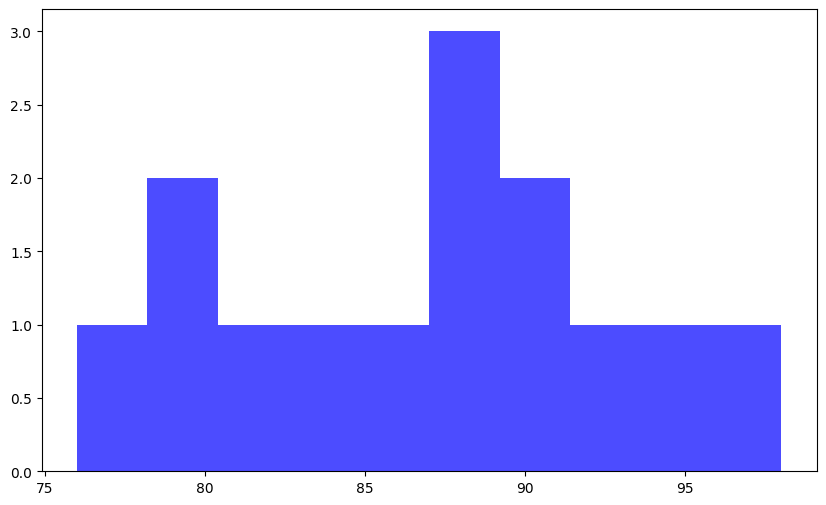

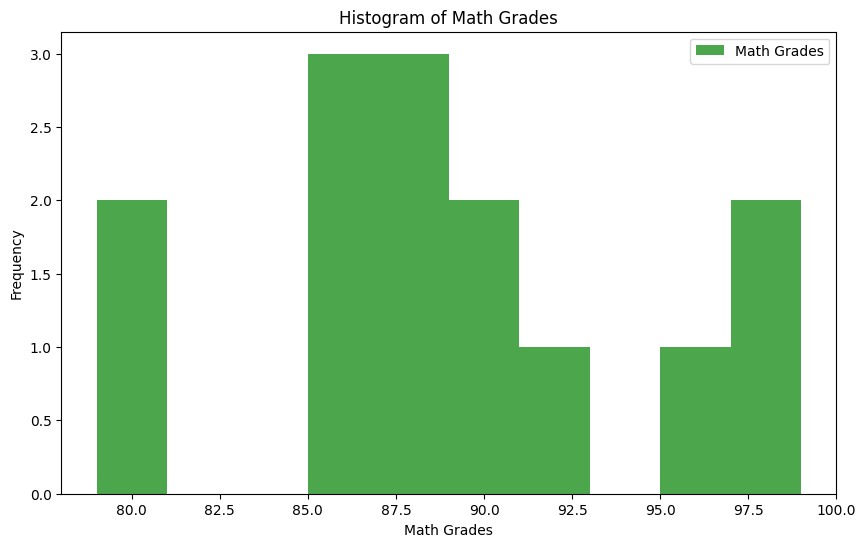

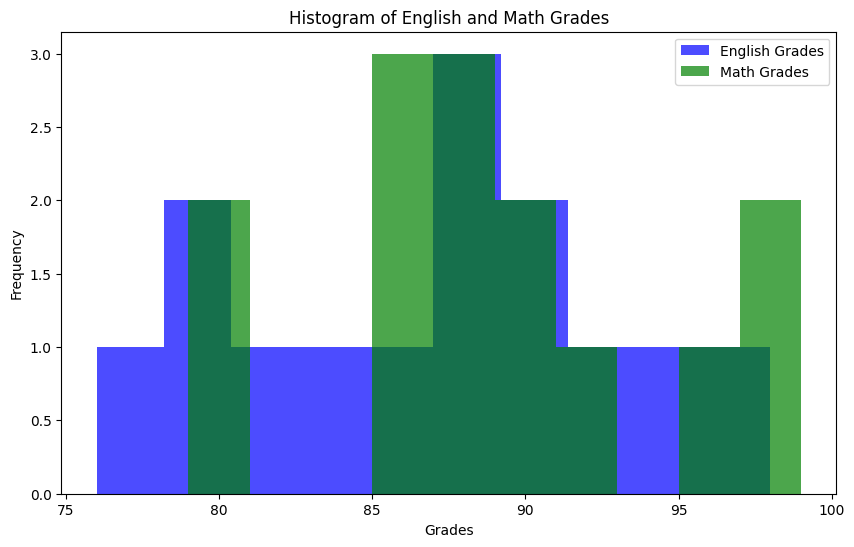

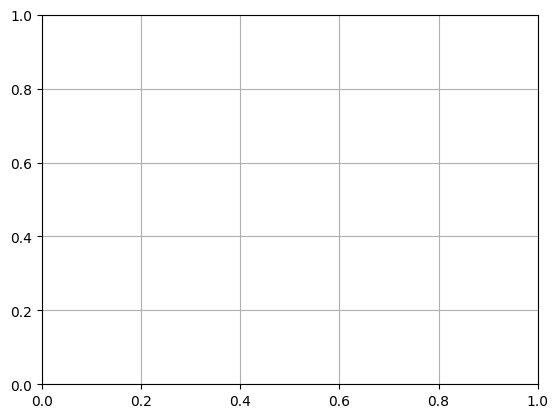

In [42]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='green')

# Add labels and title
plt.xlabel('Math Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Math Grades')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
#
# Plot the histograms for English and Math grades
plt.figure(figsize=(10, 6))

# Histogram for English Grades
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

# Histogram for Math Grades
plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='green')

# Add x and y axis labels
plt.xlabel('Grades')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of English and Math Grades')

# Add a legend and place it in the upper right
plt.legend(loc='upper right')

# Show the plot
plt.show()

plt.grid(True)

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
#
plt.savefig('histogram_english_math_grades.png')
plt.show()

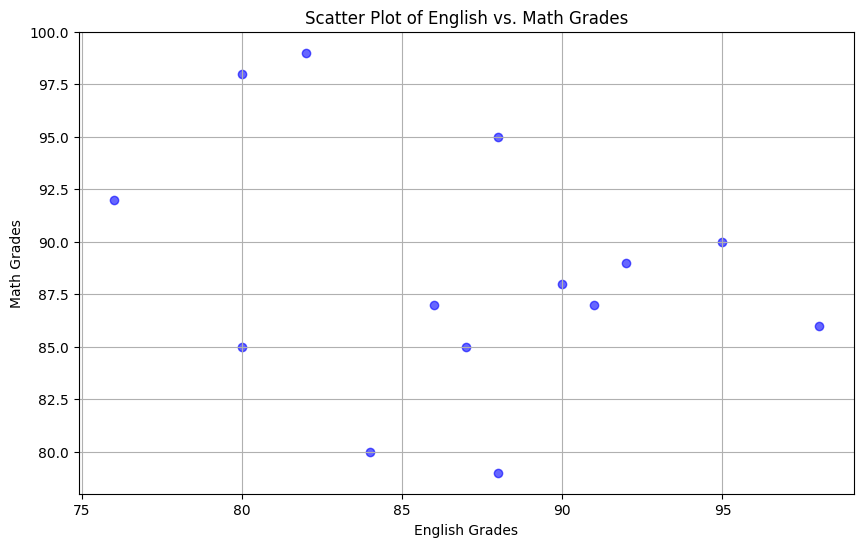

In [43]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
plt.scatter(df_studentGrades['englishGrade'], df_studentGrades['mathGrade'], color='blue', alpha=0.6)

# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
plt.xlabel('English Grades')
plt.ylabel('Math Grades')
plt.title('Scatter Plot of English vs. Math Grades')
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
plt.savefig('english_vs_math_grades_scatter_plot.png')

plt.show()

In [45]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
df_plot_relationship = "There is no correlation between the student grades in math and english, The relationship is a non linear i.e students with high grade in math do not have high score in english and vice versa "
print(df_plot_relationship)

There is no correlation between the student grades in math and english, The relationship is a non linear i.e students with high grade in math do not have high score in english and vice versa 
